# K-Means Cluster Analysis of Fidelity Fund Returns 

## Instructions

In this project, I conducted a k-means cluster analysis on a set of Fidelity mutual funds.  
This helps to group similar funds based on their performance (as opposed to their description, which is typical).  

## Data Details 

- Each row represents a mutual fund  
- Each column represents a trading day (these are used as features)  
- Each value represents the daily percentage change in price between the current trading day and previous trading day

Preprocessing the Data (using pandas) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read in the dataset
df0 = pd.read_csv('fido_returns.csv')

In [3]:
# print the head
df0.head(3)

,Index,FSCEX,FSCBX,FSCIX,FDGIX,FADBX,FADAX,FDGTX,FSFCX,FAMUX,...,FVDKX,FDVLX,FVLKX,FSLSX,FASBX,FVSKX,FWWFX,FBVFX,FCFFX,FTFFX
0,2007-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,2007-01-04,0.000000,0.000000,0.000000,0.000826,0.000828,0.000840,0.001663,0.001165,0.001,...,0.0,0.000718,0.0,0.000377,0.000857,0.0,-0.004638,0.000726,0.000000,0.000000
2,2007-01-05,-0.010407,-0.010517,-0.010764,-0.004967,-0.004979,-0.005051,-0.005831,-0.001165,0.000,...,0.0,-0.008943,0.0,-0.011749,-0.012069,0.0,-0.009927,-0.008746,-0.006826,-0.006957


In [4]:
# store the tickers in a list called tickers
tickers = list(df0.columns[1:])
tickers[:5]

['FSCEX', 'FSCBX', 'FSCIX', 'FDGIX', 'FADBX']

In [5]:
# store the dates
dates = df0.Index.values
dates[:5]

array(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
       '2007-01-09'], dtype=object)

In [6]:
# drop the index column
del df0['Index']

In [7]:
# store the dataframe values
vals = df0.values

In [8]:
# transpose the data, putting funds on rows and timepoints on columns
vals_t = vals.transpose()

In [9]:
vals_t

array([[ 0.        ,  0.        , -0.0104072 , ..., -0.00193986,
        -0.01368545,  0.01329703],
       [ 0.        ,  0.        , -0.01051664, ..., -0.00157109,
        -0.01385338,  0.01346022],
       [ 0.        ,  0.        , -0.01076437, ..., -0.00158806,
        -0.01376242,  0.0134445 ],
       ...,
       [ 0.        ,  0.00072595, -0.00874641, ...,  0.00109709,
        -0.01380094,  0.01105594],
       [ 0.        ,  0.        , -0.00682597, ...,  0.00284698,
        -0.01071822,  0.00715823],
       [ 0.        ,  0.        , -0.00695655, ...,  0.00280899,
        -0.01128362,  0.00777114]])

In [10]:
vals.shape

(1731, 927)

In [11]:
# print the shape of the transposed dataframe
vals_t.shape

(927, 1731)

In [12]:
# build the dataframe w transposed data, calling it dft.
dft = pd.DataFrame(data=vals_t, index=df0.columns, columns=dates)

In [13]:
# save preprocessed data to file (in case you wish to work with it later)
dft.to_csv ( "fido_returns_funds_on_rows.csv",index=False) 

In [13]:
dft.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2013-10-28,2013-10-29,2013-10-30,2013-10-31,2013-11-01,2013-11-04,2013-11-05,2013-11-06,2013-11-07,2013-11-08
FSCEX,0.0,0.000000,-0.010407,0.003686,-0.001841,-0.000614,0.008568,0.004863,0.000000,-0.003645,...,-0.000386,0.003470,-0.006178,-0.001163,-0.003885,0.010070,-0.005797,-0.001940,-0.013685,0.013297
FSCBX,0.0,0.000000,-0.010517,0.003724,-0.001240,-0.001241,0.008658,0.004914,-0.000613,-0.003070,...,-0.000391,0.003512,-0.006252,-0.001177,-0.003932,0.009802,-0.005870,-0.001571,-0.013853,0.013460
FSCIX,0.0,0.000000,-0.010764,0.003781,-0.001619,0.000000,0.008602,0.004274,0.000000,-0.003203,...,-0.000633,0.003789,-0.006323,-0.000952,-0.003817,0.009830,-0.005696,-0.001588,-0.013762,0.013445
FDGIX,0.0,0.000826,-0.004967,0.002487,-0.000828,0.000828,0.004955,0.005750,-0.000819,0.001638,...,0.000000,0.004001,-0.005147,-0.004598,0.001727,0.003444,-0.003444,0.002871,-0.014439,0.014439
FADBX,0.0,0.000828,-0.004979,0.002493,-0.000830,0.000830,0.004967,0.004942,0.000000,0.000821,...,0.000000,0.003704,-0.004941,-0.004344,0.001864,0.003099,-0.003099,0.002480,-0.014972,0.014972


### Load Modules and Read Data into Spark DataFrame

In [14]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

In [15]:
# Loads data
df1 = spark.read.csv('fido_returns_funds_on_rows.csv', header=True, inferSchema=True)

### Assemble the Features into a column. 

In [18]:
feats =  df1.columns     
assembler = VectorAssembler(inputCols=feats, outputCol="features")
dataset=assembler.transform(df1)
dataset.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[0.0,0.0,-0.01040...|
|[0.0,0.0,-0.01051...|
|[0.0,0.0,-0.01076...|
|[0.0,8.26105E-4,-...|
|[0.0,8.2815740000...|
+--------------------+
only showing top 5 rows



### Set up the k-means model and train the model

Parameters: 
- 3 clusters
- maximum of 10 iterations 
- seed=314

In [19]:
kmeans = KMeans().setK(3).setSeed(314).setMaxIter(10)
model = kmeans.fit(dataset)

### Compute and Print the Silhouette Score (WSSE)

In [20]:
predictions = model.transform(dataset)
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette Score = " + str(silhouette))

Silhouette Score = 0.596815339120236


### I wrote a function `kmeans_range()` that does the following when called:
- takes an integer representing the lower bound for k
- takes an integer representing the upper bound for k
- take a Spark DataFrame containing training data
- fit K-means with k ranging from lower bound to upper bound, inclusive  
- the other parameters are the same as earlier 
- for each k, compute the silhouette score
- return a pandas dataframe with columns containing k, silhouette score (each row holds the score for given k)

In [21]:
def kmeans_range(lower_b, upper_b, training):
    
    krange_df = pd.DataFrame(columns=["kvalues", "silhouette_scores"])
    
    for i in range(lower_b, upper_b + 1):
        
        kmeans = KMeans().setK(i).setSeed(314).setMaxIter(10)
        model = kmeans.fit(dataset)
        predictions = model.transform(dataset)
        silhouette = evaluator.evaluate(predictions)
        
        krange_df = krange_df.append({"kvalues": i, "silhouette_scores": silhouette}, ignore_index=True)
        
    return krange_df

### Call function to compute K-means with clusters ranging from 2 to 10 inclusive.

In [22]:
# function call, and printing results
krange_df = kmeans_range(2, 10, dataset)

In [23]:
krange_df

,kvalues,silhouette_scores
0,2.0,0.602396
1,3.0,0.596815
2,4.0,0.616752
3,5.0,0.519913
4,6.0,0.444579
5,7.0,0.402043
6,8.0,0.430343
7,9.0,0.406895
8,10.0,0.447113


### Plot numbers k on the x-axis, sihouette scores on the y-axis to inspect number of clusters that produced lowest silhouette score (WSSE) at a glance.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

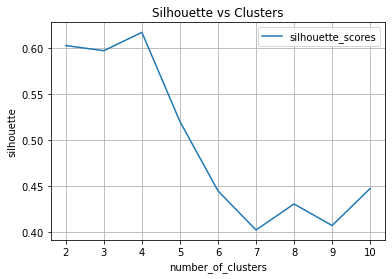

In [25]:
# k = 7 is best performing cluster
krange_df.plot(kind='line',x='kvalues',y='silhouette_scores')
plt.xlabel('number_of_clusters')
plt.ylabel('silhouette')
plt.title('Silhouette vs Clusters')
plt.grid(True)
plt.savefig("image.png")
plt.show()

### Another view

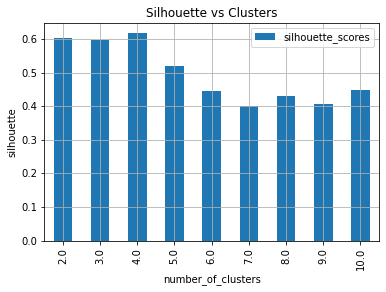

In [26]:
krange_df.plot(kind='bar',x='kvalues',y='silhouette_scores')
plt.xlabel('number_of_clusters')
plt.ylabel('silhouette')
plt.title('Silhouette vs Clusters')
plt.grid(True)
plt.savefig("image.png")
plt.show()